In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

D:\Anaconda\envs\ml\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [3]:
def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [4]:
data_train = load_data("airline_preprocessed_data_train.csv")
data_train = data_train[:20000]
data_test = load_data("airline_preprocessed_data_test.csv")
data_test = data_test[:5000]
display(data_train.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,-1.745542,0,1,-0.731305,0.203521,0.616249,0.173716,-1.547312,...,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0
1,1,0,-0.951526,1,2,-0.956916,0.203521,-0.695032,0.173716,0.017981,...,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0
2,0,1,-0.885358,1,2,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,...,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1
3,0,1,-0.951526,1,2,-0.629028,-0.549571,1.271890,1.603383,1.583273,...,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,0
4,1,1,1.430521,1,2,-0.977973,0.203521,-0.039391,0.173716,0.017981,...,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1


In [5]:
manually_selected_data_train = load_data("airline_manually_selected_data_train.csv")
manually_selected_data_train = manually_selected_data_train[:20000]
manually_selected_data_test  = load_data("airline_manually_selected_data_test.csv")
manually_selected_data_test  = manually_selected_data_train[:5000]
display(manually_selected_data_train.head())

,Online boarding,Class,Type of Travel,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Baggage handling,Inflight wifi service,Customer Type,satisfaction
0,-0.185632,1,0,1.231530,1.182991,0.479237,-0.267143,1.305913,0.311853,0.203521,1,0
1,-0.185632,2,1,-1.769166,-1.849863,-1.849452,1.253304,-1.742432,-0.534854,0.203521,0,0
2,1.296479,2,1,1.231530,1.182991,0.479237,-0.267143,1.305913,0.311853,-0.549571,1,1
3,-0.926688,2,1,-1.018992,-1.091649,-1.073222,1.253304,-0.980345,-0.534854,-0.549571,1,0
4,1.296479,2,1,-0.268818,1.182991,-0.296993,0.493081,-0.218259,0.311853,0.203521,1,1


In [6]:
atomatically_selected_data_train = load_data("airline_atomatically_selected_data_train.csv")
atomatically_selected_data_train = atomatically_selected_data_train[:20000]
atomatically_selected_data_test  = load_data("airline_atomatically_selected_data_test.csv")
atomatically_selected_data_test  = atomatically_selected_data_train[:5000]
display(atomatically_selected_data_train.head())

,Online boarding,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Seat comfort,Leg room service,Ease of Online booking,Flight Distance,Age,Customer Type,satisfaction
0,-0.185632,0.203521,1,0,1.231530,1.182991,-0.267143,0.173716,-0.731305,-1.745542,1,0
1,-0.185632,0.203521,2,1,-1.769166,-1.849863,1.253304,0.173716,-0.956916,-0.951526,0,0
2,1.296479,-0.549571,2,1,1.231530,1.182991,-0.267143,-0.541118,-0.047454,-0.885358,1,1
3,-0.926688,-0.549571,2,1,-1.018992,-1.091649,1.253304,1.603383,-0.629028,-0.951526,1,0
4,1.296479,0.203521,2,1,-0.268818,1.182991,0.493081,0.173716,-0.977973,1.430521,1,1


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [8]:
data_numerical_columns = data_train.select_dtypes(include=np.number).columns.tolist()
manual_data_numerical_columns = manually_selected_data_train.select_dtypes(include=np.number).columns.tolist()
atomatical_data_numerical_columns = atomatically_selected_data_train.select_dtypes(include=np.number).columns.tolist()

data_numerical_columns.remove('satisfaction')
manual_data_numerical_columns.remove('satisfaction')
atomatical_data_numerical_columns.remove('satisfaction')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion

data_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(data_numerical_columns)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

manual_preprocess_pipeline = Pipeline([
         ("select_numeric", DataFrameSelector(manual_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

atomatic_preprocess_pipeline = Pipeline([
         ("select_numeric", DataFrameSelector(atomatical_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

In [10]:
X_data_train = data_train.drop(['satisfaction'], axis=1)
X_manual_train = manually_selected_data_train.drop(['satisfaction'], axis=1)
X_atomatic_train = atomatically_selected_data_train.drop(['satisfaction'], axis=1)

X_data_test = data_test.drop(['satisfaction'], axis=1)
X_manual_test = manually_selected_data_test.drop(['satisfaction'], axis=1)
X_atomatic_test = atomatically_selected_data_test.drop(['satisfaction'], axis=1)

y_data_train = data_train['satisfaction'].values
y_manual_train = manually_selected_data_train['satisfaction'].values
y_atomatic_train = atomatically_selected_data_train['satisfaction'].values

y_data_test = data_test['satisfaction'].values
y_manual_test = manually_selected_data_test['satisfaction'].values
y_atomatic_test = atomatically_selected_data_test['satisfaction'].values

In [11]:
data_pipeline.fit_transform(X_data_train)

manual_preprocess_pipeline.fit_transform(X_manual_train)
atomatic_preprocess_pipeline.fit_transform(X_atomatic_train)

array([[-0.18563234,  0.20352096,  1.        , ..., -0.73130527,
        -1.7455419 ,  1.        ],
       [-0.18563234,  0.20352096,  2.        , ..., -0.95691613,
        -0.95152625,  0.        ],
       [ 1.29647912, -0.54957057,  2.        , ..., -0.04745369,
        -0.88535828,  1.        ],
       ...,
       [ 1.29647912,  1.70970403,  0.        , ..., -0.62200934,
        -1.61320596,  1.        ],
       [-0.18563234,  0.9566125 ,  1.        , ..., -0.16076047,
        -1.87787784,  1.        ],
       [ 1.29647912,  1.70970403,  0.        , ..., -0.96794599,
         1.09968083,  1.        ]])

In [12]:
X_data_train = torch.from_numpy(data_pipeline.transform(X_data_train))
X_data_test = torch.from_numpy(data_pipeline.transform(X_data_test))

X_manual_train = torch.from_numpy(manual_preprocess_pipeline.transform(X_manual_train))
X_manual_test = torch.from_numpy(manual_preprocess_pipeline.transform(X_manual_test))

X_atomatic_train = torch.from_numpy(atomatic_preprocess_pipeline.transform(X_atomatic_train))
X_atomatic_test = torch.from_numpy(atomatic_preprocess_pipeline.transform(X_atomatic_test))

In [13]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, data_list, labels):
        'Initialization'
        self.labels = labels
        self.data_list = data_list

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.data_list)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Load data and get label
        X = self.data_list[index]
        y = self.labels[index]

        return X, y

In [14]:
batch_size=512

data_training_set = Dataset(X_data_train, y_data_train)
data_training_generator = torch.utils.data.DataLoader(data_training_set, batch_size=batch_size, shuffle=True)

data_validation_set = Dataset(X_data_test, y_data_test)
data_validation_generator = torch.utils.data.DataLoader(data_validation_set, batch_size=batch_size, shuffle=False)

manual_training_set = Dataset(X_manual_train, y_manual_train)
manual_training_generator = torch.utils.data.DataLoader(manual_training_set, batch_size=batch_size, shuffle=True)

manual_validation_set = Dataset(X_manual_test, y_manual_test)
manual_validation_generator = torch.utils.data.DataLoader(manual_validation_set, batch_size=batch_size, shuffle=False)

atomatic_training_set = Dataset(X_atomatic_train, y_atomatic_train)
atomatic_training_generator = torch.utils.data.DataLoader(atomatic_training_set, batch_size=batch_size, shuffle=True)

atomatic_validation_set = Dataset(X_atomatic_test, y_atomatic_test)
atomatic_validation_generator = torch.utils.data.DataLoader(atomatic_validation_set, batch_size=batch_size, shuffle=False)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
from collections import OrderedDict

class NeuralNet1(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet1, self).__init__()
        self.features = self._make_layers(input_size)
    
    def forward(self, x):
        out = self.features(x)
        return out
    
    @staticmethod
    def _make_layers(input_size):
        return nn.Sequential(OrderedDict([
          ('ln1', nn.Linear(input_size, 20)),
          ('relu1', nn.ReLU(inplace=True)),
#           ('ln2', nn.Linear(512, 256)),
#           ('relu2', nn.ReLU(inplace=True)),
#           ('ln3', nn.Linear(256, 128)),
#           ('relu3', nn.ReLU(inplace=True)),
          ('ln4', nn.Linear(20, 5)),
          ('relu4', nn.ReLU(inplace=True)),
          ('ln5', nn.Linear(5,2))
        ]))

model_data     = NeuralNet1(22).to(device)
model_manual   = NeuralNet1(11).to(device)
model_atomatic = NeuralNet1(11).to(device)

In [17]:
class NeuralNetBN(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetBN, self).__init__()
        self.features = self._make_layers(input_size)
    
    def forward(self, x):
        out = self.features(x)
        return out
    
    @staticmethod
    def _make_layers(input_size):
        return nn.Sequential(OrderedDict([
          ('ln1', nn.Linear(input_size, 20)),
          ('bn1', nn.BatchNorm1d(20)),
          ('relu1', nn.ReLU(inplace=True)),
#           ('ln2', nn.Linear(512, 256)),
#           ('bn2', nn.BatchNorm1d(256)),
#           ('relu2', nn.ReLU(inplace=True)),
#           ('ln3', nn.Linear(256, 128)),
#           ('bn3', nn.BatchNorm1d(128)),
#           ('relu3', nn.ReLU(inplace=True)),
          ('ln4', nn.Linear(20, 5)),
          ('bn4', nn.BatchNorm1d(5)),
          ('relu4', nn.ReLU(inplace=True)),
          ('ln5', nn.Linear(5,2)),
        ]))

model_bn_data     = NeuralNetBN(22).to(device)
model_bn_manual   = NeuralNetBN(11).to(device)
model_bn_atomatic = NeuralNetBN(11).to(device)

In [18]:
class NeuralNetDR(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetBN, self).__init__()
        self.features = self._make_layers(input_size)
    
    def forward(self, x):
        out = self.features(x)
        return out
    
    @staticmethod
    def _make_layers(input_size):
        return nn.Sequential(OrderedDict([
          ('ln1', nn.Linear(input_size, 20)),
          ('dr1', nn.Dropout(0.3)),
          ('relu1', nn.ReLU(inplace=True)),
#           ('ln2', nn.Linear(512, 256)),
#           ('dr2', nn.Dropout(0.3)),
#           ('relu2', nn.ReLU(inplace=True)),
#           ('ln3', nn.Linear(256, 128)),
#           ('dr3', nn.Dropout(0.3)),
#           ('relu3', nn.ReLU(inplace=True)),
          ('ln4', nn.Linear(20, 5)),
          ('dr4', nn.Dropout(0.3)),
          ('relu4', nn.ReLU(inplace=True)),
          ('ln5', nn.Linear(5,2)),
        ]))

model_dr_data     = NeuralNetDR(22).to(device)
model_dr_manual   = NeuralNetDR(11).to(device)
model_dr_atomatic = NeuralNetDR(11).to(device)

In [19]:
class TrainTestModel:
    def __init__(self, model, num_epochs = 10, learning_rate = 0.001):
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.model = model
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        self.history = {'acc':[], 'val_acc':[], 'loss':[], 'val_loss':[]}
        
    def get_history(self):
        return self.history
        
    def train(self, train_loader, test_loader):
         for epoch in range(self.num_epochs):
            
            true_positives = 0
            false_positives = 0
            false_negatives = 0
            
            all_loss = 0
            correct_answers = 0
            all_inputs = 0
            minibatches_number = 0

            for i, (customers, labels) in enumerate(train_loader):
                # Forward pass
                output = self.model(customers.float())
                loss = self.criterion(output, labels)

                # Backprpagation and optimization
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                _, predicted = torch.max(output.data, 1)
                
                actual_correct = predicted.eq(labels.data).cpu().sum()
                
                true_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==1])
                false_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==0])
                false_negatives += len([x for x, y in zip(predicted, labels) if x==0 and y==1])

                all_inputs += labels.size(0)
                correct_answers += actual_correct
                all_loss += loss.item()
                minibatches_number += 1
                
                if true_positives+false_negatives != 0:
                    recall = true_positives/(true_positives+false_negatives)
                else:
                    recall = 0
                    
                if true_positives+false_positives != 0:
                    precision = true_positives/(true_positives+false_positives)
                else:
                    precision = 0
        
                if (i+1)%10 == 0:
                    print(f'[epoch {epoch}] train loss: {all_loss / minibatches_number :.3f} | train acc: {100. * correct_answers / all_inputs :.3f}%')
                    print(f'[epoch {epoch}] recall: {recall:.3f} | precision: {precision :.3f}')
            
            self.history['acc'].append(100. * correct_answers / all_inputs)
            self.history['loss'].append(all_loss / minibatches_number)
            
            true_positives = 0
            false_positives = 0
            false_negatives = 0
            
            all_loss = 0
            correct_answers = 0
            all_inputs = 0
            minibatches_number = 0
            
            for customers, labels in test_loader:
                          
                outputs = self.model(customers.float())
                _, predicted = torch.max(outputs.data, 1)

                loss = self.criterion(outputs, labels)
                
                actual_correct = predicted.eq(labels.data).cpu().sum()
                actual_input = labels.size(0)
                
                true_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==1])
                false_positives += len([x for x, y in zip(predicted, labels) if x==1 and y==0])
                false_negatives += len([x for x, y in zip(predicted, labels) if x==0 and y==1])
                
                if true_positives+false_negatives != 0:
                    recall = true_positives/(true_positives+false_negatives)
                else:
                    recall = 0
                    
                if true_positives+false_positives != 0:
                    precision = true_positives/(true_positives+false_positives)
                else:
                    precision = 0
                
                all_inputs += actual_input
                correct_answers += actual_correct
                all_loss += loss.item()
                minibatches_number += 1
                
                
  
            print(f'[epoch {epoch}] test loss: {all_loss/minibatches_number :.3f} | test acc: {100. * correct_answers / all_inputs :.3f}%')
            print(f'[epoch {epoch}] test recall: {recall :.3f} | test precision: {precision :.3f}')
            self.history['val_acc'].append(100. * correct_answers / all_inputs)
            self.history['val_loss'].append(all_loss / minibatches_number)
        

In [20]:
traintest_data = TrainTestModel(model_data)
traintest_manual = TrainTestModel(model_manual)
traintest_atomatic = TrainTestModel(model_atomatic)

traintest_bn_data = TrainTestModel(model_bn_data)
traintest_bn_manual = TrainTestModel(model_bn_manual)
traintest_bn_atomatic = TrainTestModel(model_bn_atomatic)

traintest_dr_data = TrainTestModel(model_dr_data)
traintest_dr_manual = TrainTestModel(model_dr_manual)
traintest_dr_atomatic = TrainTestModel(model_dr_atomatic)

traintest_data.train(data_training_generator, data_validation_generator)

[epoch 0] train loss: 0.690 | train acc: 57.207%
[epoch 0] recall: 0.009 | precision: 0.633
[epoch 0] train loss: 0.681 | train acc: 57.578%
[epoch 0] recall: 0.030 | precision: 0.836
[epoch 0] train loss: 0.673 | train acc: 59.004%
[epoch 0] recall: 0.075 | precision: 0.889
[epoch 0] train loss: 0.664 | train acc: 61.005%
[epoch 0] recall: 0.126 | precision: 0.886
[epoch 0] test loss: 0.621 | test acc: 70.920%
[epoch 0] test recall: 0.393 | test precision: 0.870
[epoch 1] train loss: 0.608 | train acc: 71.992%
[epoch 1] recall: 0.424 | precision: 0.851
[epoch 1] train loss: 0.591 | train acc: 74.092%
[epoch 1] recall: 0.489 | precision: 0.848
[epoch 1] train loss: 0.574 | train acc: 75.723%
[epoch 1] recall: 0.541 | precision: 0.848
[epoch 1] train loss: 0.560 | train acc: 76.685%
[epoch 1] recall: 0.581 | precision: 0.837
[epoch 1] test loss: 0.487 | test acc: 81.680%
[epoch 1] test recall: 0.749 | test precision: 0.817
[epoch 2] train loss: 0.466 | train acc: 82.480%
[epoch 2] recal

In [21]:
traintest_manual.train(manual_training_generator, manual_validation_generator)

[epoch 0] train loss: 0.661 | train acc: 71.758%
[epoch 0] recall: 0.521 | precision: 0.758
[epoch 0] train loss: 0.648 | train acc: 74.395%
[epoch 0] recall: 0.622 | precision: 0.756
[epoch 0] train loss: 0.634 | train acc: 75.645%
[epoch 0] recall: 0.676 | precision: 0.742
[epoch 0] train loss: 0.619 | train acc: 76.270%
[epoch 0] recall: 0.706 | precision: 0.740
[epoch 0] test loss: 0.566 | test acc: 77.820%
[epoch 0] test recall: 0.812 | test precision: 0.717
[epoch 1] train loss: 0.551 | train acc: 78.145%
[epoch 1] recall: 0.811 | precision: 0.726
[epoch 1] train loss: 0.541 | train acc: 78.096%
[epoch 1] recall: 0.811 | precision: 0.726
[epoch 1] train loss: 0.527 | train acc: 78.926%
[epoch 1] recall: 0.815 | precision: 0.733
[epoch 1] train loss: 0.517 | train acc: 79.500%
[epoch 1] recall: 0.813 | precision: 0.743
[epoch 1] test loss: 0.472 | test acc: 80.820%
[epoch 1] test recall: 0.799 | test precision: 0.769
[epoch 2] train loss: 0.458 | train acc: 81.738%
[epoch 2] recal

In [22]:
traintest_atomatic.train(atomatic_training_generator, atomatic_validation_generator)

[epoch 0] train loss: 0.707 | train acc: 56.797%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.706 | train acc: 56.621%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.707 | train acc: 55.996%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.702 | train acc: 56.210%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] test loss: 0.683 | test acc: 56.460%
[epoch 0] test recall: 0.000 | test precision: 0.000
[epoch 1] train loss: 0.679 | train acc: 55.723%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.668 | train acc: 55.898%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.654 | train acc: 58.112%
[epoch 1] recall: 0.048 | precision: 0.958
[epoch 1] train loss: 0.637 | train acc: 62.570%
[epoch 1] recall: 0.165 | precision: 0.891
[epoch 1] test loss: 0.568 | test acc: 81.140%
[epoch 1] test recall: 0.746 | test precision: 0.806
[epoch 2] train loss: 0.544 | train acc: 81.934%
[epoch 2] recal

In [23]:
traintest_bn_data.train(data_training_generator, data_validation_generator)
traintest_bn_manual.train(manual_training_generator, manual_validation_generator)
traintest_bn_atomatic.train(atomatic_training_generator, atomatic_validation_generator)

[epoch 0] train loss: 0.683 | train acc: 56.660%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.681 | train acc: 56.084%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.676 | train acc: 56.471%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.671 | train acc: 56.215%
[epoch 0] recall: 0.000 | precision: 1.000
[epoch 0] test loss: 0.644 | test acc: 56.500%
[epoch 0] test recall: 0.005 | test precision: 1.000
[epoch 1] train loss: 0.635 | train acc: 59.395%
[epoch 1] recall: 0.075 | precision: 0.994
[epoch 1] train loss: 0.623 | train acc: 65.596%
[epoch 1] recall: 0.221 | precision: 0.978
[epoch 1] train loss: 0.608 | train acc: 70.260%
[epoch 1] recall: 0.345 | precision: 0.934
[epoch 1] train loss: 0.594 | train acc: 72.625%
[epoch 1] recall: 0.420 | precision: 0.903
[epoch 1] test loss: 0.529 | test acc: 81.700%
[epoch 1] test recall: 0.727 | test precision: 0.833
[epoch 2] train loss: 0.510 | train acc: 81.562%
[epoch 2] recal

[epoch 7] train loss: 0.350 | train acc: 86.335%
[epoch 7] recall: 0.814 | precision: 0.866
[epoch 7] test loss: 0.351 | test acc: 86.380%
[epoch 7] test recall: 0.817 | test precision: 0.863
[epoch 8] train loss: 0.344 | train acc: 86.309%
[epoch 8] recall: 0.804 | precision: 0.867
[epoch 8] train loss: 0.342 | train acc: 86.602%
[epoch 8] recall: 0.807 | precision: 0.874
[epoch 8] train loss: 0.341 | train acc: 86.439%
[epoch 8] recall: 0.809 | precision: 0.872
[epoch 8] train loss: 0.342 | train acc: 86.685%
[epoch 8] recall: 0.816 | precision: 0.871
[epoch 8] test loss: 0.343 | test acc: 86.780%
[epoch 8] test recall: 0.825 | test precision: 0.865
[epoch 9] train loss: 0.329 | train acc: 87.031%
[epoch 9] recall: 0.823 | precision: 0.878
[epoch 9] train loss: 0.329 | train acc: 87.002%
[epoch 9] recall: 0.823 | precision: 0.877
[epoch 9] train loss: 0.326 | train acc: 87.201%
[epoch 9] recall: 0.823 | precision: 0.877
[epoch 9] train loss: 0.328 | train acc: 87.025%
[epoch 9] recal

In [24]:
traintest_dr_data.train(data_training_generator, data_validation_generator)
traintest_dr_manual.train(manual_training_generator, manual_validation_generator)
traintest_dr_atomatic.train(atomatic_training_generator, atomatic_validation_generator)

[epoch 0] train loss: 0.698 | train acc: 56.191%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.694 | train acc: 56.152%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.690 | train acc: 56.230%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] train loss: 0.685 | train acc: 56.210%
[epoch 0] recall: 0.000 | precision: 0.000
[epoch 0] test loss: 0.663 | test acc: 56.280%
[epoch 0] test recall: 0.000 | test precision: 0.000
[epoch 1] train loss: 0.654 | train acc: 56.270%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.645 | train acc: 56.338%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.637 | train acc: 56.217%
[epoch 1] recall: 0.000 | precision: 0.000
[epoch 1] train loss: 0.628 | train acc: 56.225%
[epoch 1] recall: 0.000 | precision: 1.000
[epoch 1] test loss: 0.588 | test acc: 60.280%
[epoch 1] test recall: 0.094 | test precision: 0.976
[epoch 2] train loss: 0.578 | train acc: 72.090%
[epoch 2] recal

[epoch 7] train loss: 0.320 | train acc: 86.785%
[epoch 7] recall: 0.828 | precision: 0.864
[epoch 7] test loss: 0.320 | test acc: 86.780%
[epoch 7] test recall: 0.833 | test precision: 0.859
[epoch 8] train loss: 0.305 | train acc: 87.207%
[epoch 8] recall: 0.835 | precision: 0.873
[epoch 8] train loss: 0.304 | train acc: 87.451%
[epoch 8] recall: 0.837 | precision: 0.873
[epoch 8] train loss: 0.304 | train acc: 87.461%
[epoch 8] recall: 0.836 | precision: 0.873
[epoch 8] train loss: 0.298 | train acc: 87.650%
[epoch 8] recall: 0.837 | precision: 0.875
[epoch 8] test loss: 0.301 | test acc: 87.860%
[epoch 8] test recall: 0.844 | test precision: 0.873
[epoch 9] train loss: 0.294 | train acc: 87.793%
[epoch 9] recall: 0.852 | precision: 0.864
[epoch 9] train loss: 0.282 | train acc: 88.516%
[epoch 9] recall: 0.858 | precision: 0.875
[epoch 9] train loss: 0.283 | train acc: 88.470%
[epoch 9] recall: 0.853 | precision: 0.879
[epoch 9] train loss: 0.286 | train acc: 88.505%
[epoch 9] recal

In [25]:
history_data = traintest_data.get_history()
history_manual = traintest_manual.get_history()
history_atomatic = traintest_atomatic.get_history()

history_bn_data = traintest_bn_data.get_history()
history_bn_manual = traintest_bn_manual.get_history()
history_bn_atomatic = traintest_bn_atomatic.get_history()

history_dr_data = traintest_dr_data.get_history()
history_dr_manual = traintest_dr_manual.get_history()
history_dr_atomatic = traintest_dr_atomatic.get_history()

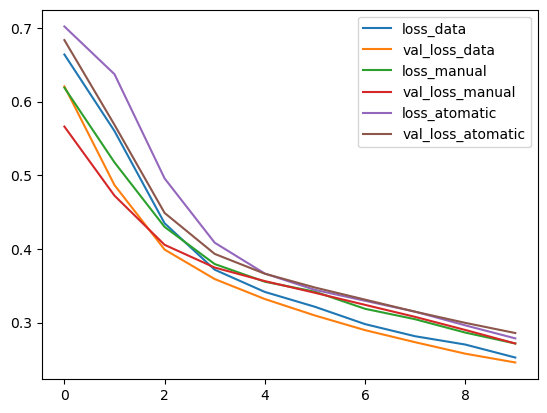

In [26]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_data['loss']), label='loss_data')
plt.plot(pd.DataFrame(history_data['val_loss']), label='val_loss_data')
plt.plot(pd.DataFrame(history_manual['loss']), label='loss_manual')
plt.plot(pd.DataFrame(history_manual['val_loss']), label='val_loss_manual')
plt.plot(pd.DataFrame(history_atomatic['loss']), label='loss_atomatic')
plt.plot(pd.DataFrame(history_atomatic['val_loss']), label='val_loss_atomatic')

plt.legend()
plt.show()

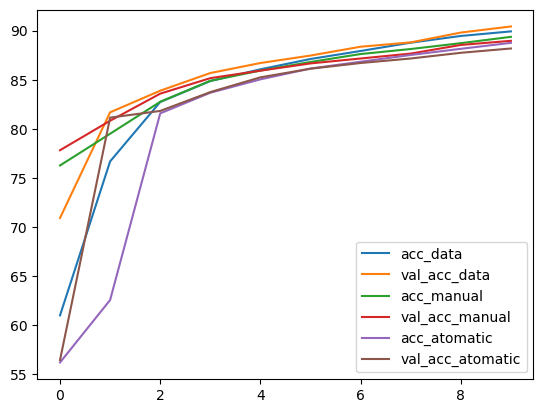

In [27]:
plt.plot(pd.DataFrame(history_data['acc']), label='acc_data')
plt.plot(pd.DataFrame(history_data['val_acc']), label='val_acc_data')
plt.plot(pd.DataFrame(history_manual['acc']), label='acc_manual')
plt.plot(pd.DataFrame(history_manual['val_acc']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_atomatic['acc']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_atomatic['val_acc']), label='val_acc_atomatic')

plt.legend()
plt.show()

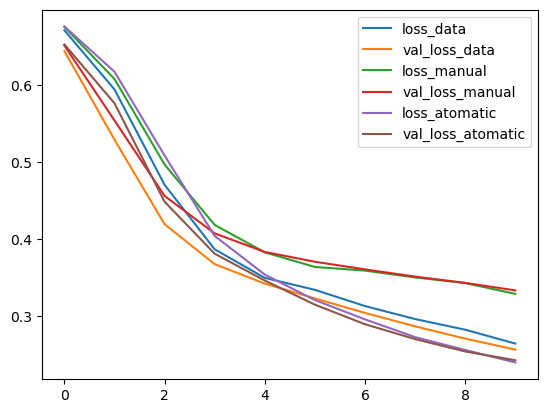

In [28]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_bn_data['loss']), label='loss_data')
plt.plot(pd.DataFrame(history_bn_data['val_loss']), label='val_loss_data')
plt.plot(pd.DataFrame(history_bn_manual['loss']), label='loss_manual')
plt.plot(pd.DataFrame(history_bn_manual['val_loss']), label='val_loss_manual')
plt.plot(pd.DataFrame(history_bn_atomatic['loss']), label='loss_atomatic')
plt.plot(pd.DataFrame(history_bn_atomatic['val_loss']), label='val_loss_atomatic')

plt.legend()
plt.show()

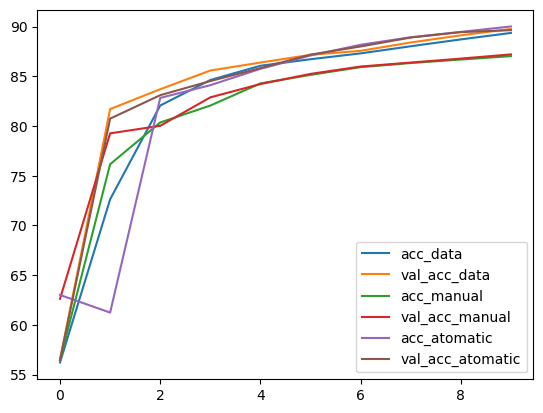

In [29]:
plt.plot(pd.DataFrame(history_bn_data['acc']), label='acc_data')
plt.plot(pd.DataFrame(history_bn_data['val_acc']), label='val_acc_data')
plt.plot(pd.DataFrame(history_bn_manual['acc']), label='acc_manual')
plt.plot(pd.DataFrame(history_bn_manual['val_acc']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_bn_atomatic['acc']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_bn_atomatic['val_acc']), label='val_acc_atomatic')

plt.legend()
plt.show()

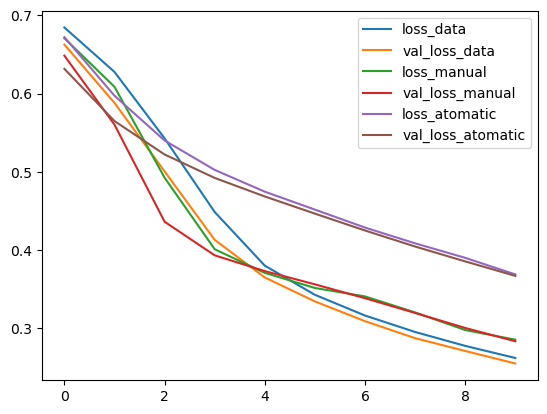

In [30]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_dr_data['loss']), label='loss_data')
plt.plot(pd.DataFrame(history_dr_data['val_loss']), label='val_loss_data')
plt.plot(pd.DataFrame(history_dr_manual['loss']), label='loss_manual')
plt.plot(pd.DataFrame(history_dr_manual['val_loss']), label='val_loss_manual')
plt.plot(pd.DataFrame(history_dr_atomatic['loss']), label='loss_atomatic')
plt.plot(pd.DataFrame(history_dr_atomatic['val_loss']), label='val_loss_atomatic')

plt.legend()
plt.show()

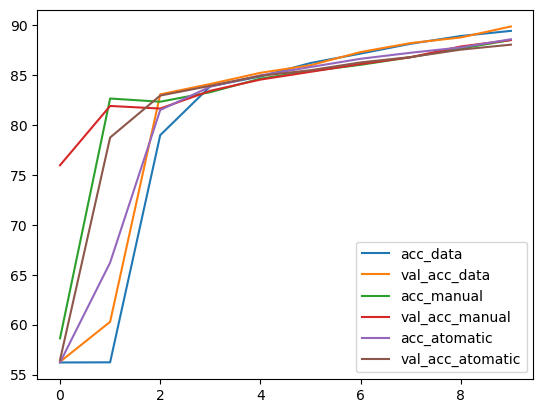

In [31]:
plt.plot(pd.DataFrame(history_dr_data['acc']), label='acc_data')
plt.plot(pd.DataFrame(history_dr_data['val_acc']), label='val_acc_data')
plt.plot(pd.DataFrame(history_dr_manual['acc']), label='acc_manual')
plt.plot(pd.DataFrame(history_dr_manual['val_acc']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_dr_atomatic['acc']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_dr_atomatic['val_acc']), label='val_acc_atomatic')

plt.legend()
plt.show()